# Exercise 2
Mutation:

Mutation is a genetic operator that introduces small random changes in individuals within a population.
It serves to maintain genetic diversity and explore new solutions.
In the context of a binary representation of patterns (e.g., sequences of 0s and 1s), mutation typically flips (inverts) one or more bits at random positions within an individual, creating a new individual with a slight variation from its parent.
Mutation helps escape local optima by exploring the solution space more broadly and introducing novel patterns.

In [1]:
import random
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt


In [2]:
def random_pattern():
    return random.choice([0,1])
    
def string_maker(comb):
    bit=0
    pattern=[]
    while bit != comb:
        rand_bit=random_pattern()
        pattern.append(rand_bit)
        bit +=1
    return pattern

def fitness(string,comb,goal):
    fit=0
    range=np.arange(0,comb,1)
    for i in range:
        if string[i]==goal[i]:
             fit += (1/comb)        #fitness score computed as a fraction of the length of the combination
    return fit

def single_mutation(string):
    mut_string=string.copy()
    random_digit=random.choice(range(len(string)))
    if mut_string[random_digit] == 0:
        mut_string[random_digit] +=1
    else: mut_string[random_digit] =0
    return mut_string


final survivor: 25
final population: 100
time: 0.0176
Number of generations: 23
time per generation: 0.00077


[[2279, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [2281, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [2274, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [2376, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [2377, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1923, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1475, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [2374, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [2477, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [2043, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [2043, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [3980, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [4076, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [4177, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [4278, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [4380, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1

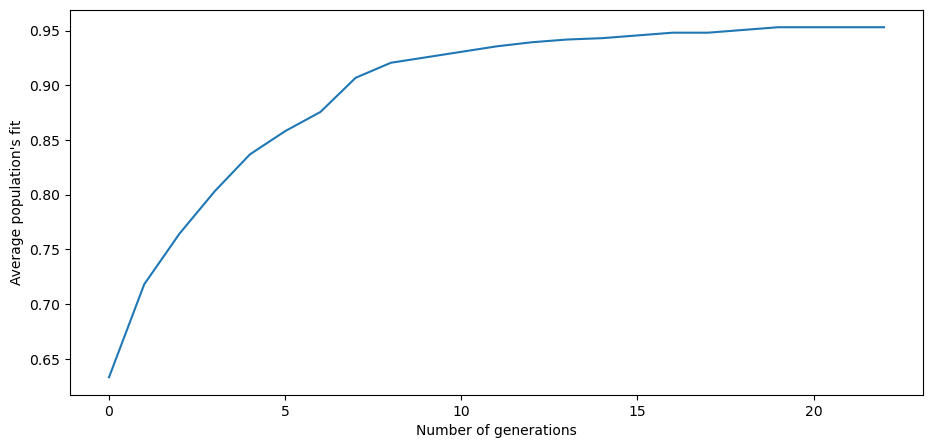

In [3]:
random.seed(10)
POP = 100
comb = 16
goal=string_maker(comb)

pop = []

start_t=time.time()
for i in range(POP):
    string = string_maker(comb)
    fit = fitness(string, comb, goal)
    pop.append([i, string, fit])


avg_fit = []
stagnation_threshold = 3 
stagnation_count = 0
it=0

while stagnation_count < stagnation_threshold:
    survivors = sorted(pop, key=lambda x: x[2], reverse=True)
    survivors = survivors[:int(POP * 0.25)]
    pop = []
    it+=1

    for survivor in survivors:
        count = 0
        pop.append(survivor)

        while count != 3:

            goal = goal
            string = survivor[1]
            son = single_mutation(string)
            fitx = fitness(son, comb, goal)
            n = count + survivor[0] + (100 * it)
            pop.append([n, son, fitx])
            count += 1


    fit_list = [i[2] for i in pop]
    sum_of_elements = sum(fit_list)
    average = sum_of_elements / len(fit_list)
    avg_fit.append(average)


    if len(avg_fit) >= 2 and avg_fit[-1] <= avg_fit[-2]:
        stagnation_count += 1
    else:
        stagnation_count = 0
end_t=time.time()
total_time=end_t-start_t
time_per_gen=total_time/it

print('final survivor:',len(survivors))
print('final population:',len(pop))
print(f'time: {total_time:.4f}')

avg_fit=pd.Series(avg_fit)
avg_fit.plot(figsize=(11,5))
plt.ylabel("Average population's fit")
plt.xlabel("Number of generations")
plt.show

print('Number of generations:',it)
print(f'time per generation: {time_per_gen:.5f}')
survivors



# Exercise 3
Crossover (Recombination):

Crossover is a genetic operator that combines genetic material from two parent individuals to create one or more offspring.
It serves to exploit promising areas of the solution space by combining good characteristics from two parent solutions.
In the context of binary representations, crossover typically involves selecting a crossover point and swapping genetic material (bits) between two parent individuals at that point, producing one or more offspring.
Crossover allows the algorithm to inherit the best qualities from different parents and can help in the convergence towards optimal solutions

In [4]:
def crossover(string, partner):
    son = string.copy()
    correction=(random.randint(0,7))
    genes_1 = random.randint(0+correction, len(string) // 2)
    genes_2 = random.randint(len(string) // 2, len(string)-correction)
    son[genes_1:genes_2] = partner[genes_1:genes_2]
    return son

I applied a correction in order to make the cross-section smaller, in order to be more realistic and similar to the biological mechanism.

final survivor: 25
final population: 100
time: 0.0100
Number of generations: 7
time per generation: 0.00143


[[0, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [600, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [601, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [602, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [500, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1100, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1101, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1102, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [501, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1101, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1102, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1103, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [502, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1102, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1103, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 1.0],
 [1104, [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0

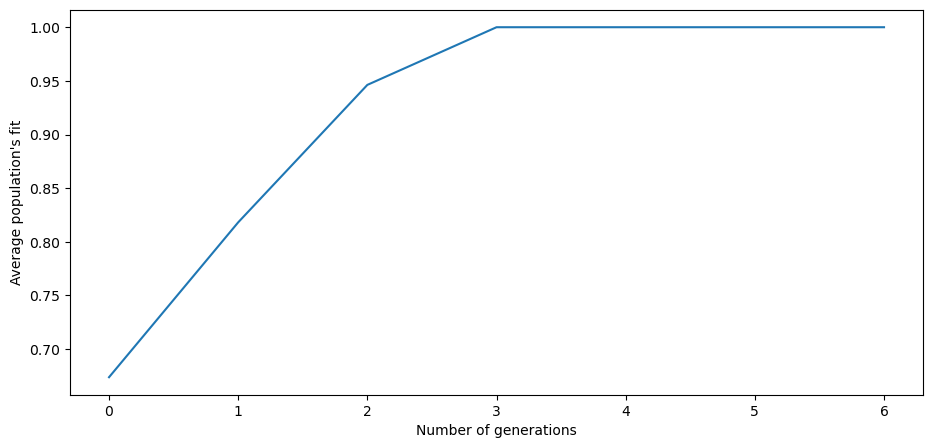

In [5]:

POP = 100
comb = 16
random.seed(10)

pop = []

start_t=time.time()
for i in range(POP):
    string = string_maker(comb)
    fit = fitness(string, comb, goal)
    pop.append([i, string, fit])


avg_fit = []
stagnation_threshold = 3 
stagnation_count = 0
it=0

while stagnation_count < stagnation_threshold:
    survivors = sorted(pop, key=lambda x: x[2], reverse=True)
    survivors = survivors[:int(POP * 0.25)]
    pop = []
    it+=1

    for survivor in survivors:
        count = 0
        pop.append(survivor)

        while count != 3:
            goal = goal
            partner_n=random.choice(range(len(survivors)))
            partner=survivors[partner_n]
            partner_genes=partner[1]
            string = survivor[1]

            son=crossover(string,partner_genes)
            fitx = fitness(son,comb, goal)
            n = count + survivor[0] + (100 * it)
            pop.append([n, son, fitx])
            count += 1


    fit_list = [i[2] for i in pop]
    sum_of_elements = sum(fit_list)
    average = sum_of_elements / len(fit_list)
    avg_fit.append(average)


    if len(avg_fit) >= 2 and avg_fit[-1] <= avg_fit[-2]:
        stagnation_count += 1
    else:
        stagnation_count = 0

end_t=time.time()
total_time=end_t-start_t
time_per_gen=total_time/it

print('final survivor:',len(survivors))
print('final population:',len(pop))
print(f'time: {total_time:.4f}')

avg_fit=pd.Series(avg_fit)
avg_fit.plot(figsize=(11,5))
plt.ylabel("Average population's fit")
plt.xlabel("Number of generations")
plt.show

print('Number of generations:',it)
print(f'time per generation: {time_per_gen:.5f}')
survivors


# Comments
Runtime:

Regarding the runtime, the overall results show that the single mutation takes more time to get to a stagnation point (7.2ms crossover vs 12.7ms single mutation), but if we consider the time needed to run a generation (total time/number of gen) the data shown that the crossover algorithm is a little bit slower (1.03ms crossover vs 0.55ms single mutation).

Generations:

Considering this metric the crossover wins easily (with this seed) only 7 generations are needed against the 23 gens of the mutation model.

Accuracy:

The crossover model discovered entirely the target, the mutation was closed but found only 95% of the target goal.


# Exercise 4
Explain the changes that would be necessary in the evaluation function, mutation, and
crossover to deal with a similar problem where the size of the target bit pattern would be
unknown.

In [6]:
def random_pattern():
    return random.choice([0,1])

    
def string_maker():
    string_size=random.choice(range(16))
    bit=0
    pattern=[]
    while bit != string_size:
        rand_bit=random_pattern()
        pattern.append(rand_bit)
        bit +=1
    return pattern

def fitness(string, goal):
    fit = 0
    min_len = min(len(string), len(goal))  
    for i in range(min_len):
        if string[i] == goal[i]:
            fit += 1
    length_penalty = abs(len(string) - len(goal))
    fit -= length_penalty                             
    return fit

def single_mutation(string):
    mut_string=string.copy()
    random_digit=random.choice(range(len(string)))
    if mut_string[random_digit] == 0:
        mut_string[random_digit] +=1
    else: mut_string[random_digit] =0
    return mut_string


goal: [0, 1, 0, 1, 1, 1, 0, 1, 1, 0] --goal size: 10
time: 0.0058
Number of generations: 20
time per generation: 0.00029


[[1231, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [927, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1329, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2533, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2535, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1432, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1531, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1530, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1630, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1928, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2131, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2533, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2428, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2429, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2831, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2832, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2632, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1126, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [3134, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [3229, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [3231, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [3534, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [3933, [0,

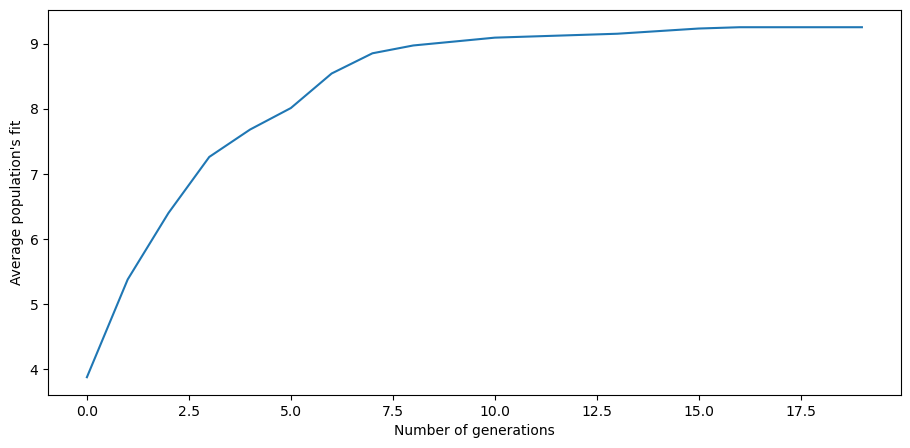

In [7]:
#mutation

random.seed(35)
POP = 100
goal=string_maker()
print('goal:',goal,'--goal size:',(len(goal)))
pop = []

start_t=time.time()
for i in range(POP):
    string = string_maker()
    fit = fitness(string, goal)
    pop.append([i, string, fit])


avg_fit = []
stagnation_threshold = 3
stagnation_count = 0
it=0

while stagnation_count < stagnation_threshold:
    survivors = sorted(pop, key=lambda x: x[2], reverse=True)
    survivors = survivors[:int(POP * 0.25)]
    pop = []
    it+=1

    for survivor in survivors:
        count = 0
        pop.append(survivor)

        while count != 3:

            goal = goal
            string = survivor[1]
            son = single_mutation(string)
            fitx = fitness(son, goal)
            n = count + survivor[0] + (100 * it)
            pop.append([n, son, fitx])
            count += 1


    fit_list = [i[2] for i in pop]
    sum_of_elements = sum(fit_list)
    average = sum_of_elements / len(fit_list)
    avg_fit.append(average)


    if len(avg_fit) >= 2 and avg_fit[-1] <= avg_fit[-2]:
        stagnation_count += 1
    else:
        stagnation_count = 0
end_t=time.time()
total_time=end_t-start_t
time_per_gen=total_time/it


print(f'time: {total_time:.4f}')

avg_fit=pd.Series(avg_fit)
avg_fit.plot(figsize=(11,5))
plt.ylabel("Average population's fit")
plt.xlabel("Number of generations")
plt.show

print('Number of generations:',it)
print(f'time per generation: {time_per_gen:.5f}')
#avg_fit
survivors


# Comments - mutation
To run this model by assuming an unknown target length, I had to restructure the code without the 'comb' variable, that I used in all the previous exercises.
In this way, the model creates random individuals with a variable length, but at the end of each generation, only the individual with the higher scores survives.

I also had to change the fitness function to be sure that only the length of the individual would be used in the evaluation now the function assigns one point for each correct value inside the list. 

Moreover, after several tries where the final population had a different length from the goal ones, I decided to implement a penalty proportional to the difference from the target length.

The single mutation function is unchanged.


goal: [0, 1, 0, 1, 1, 1, 0, 1, 1, 0] --goal size: 10
time: 0.0050
Number of generations: 10
time per generation: 0.00050


[[1139, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2039, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2040, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2041, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1939, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2839, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2840, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2841, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1940, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2840, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2841, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2842, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1941, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2841, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2842, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2843, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [1839, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2739, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2740, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2741, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [2639, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [3539, [0, 1, 0, 1, 1, 1, 0, 1, 1, 0], 10],
 [3540, [0

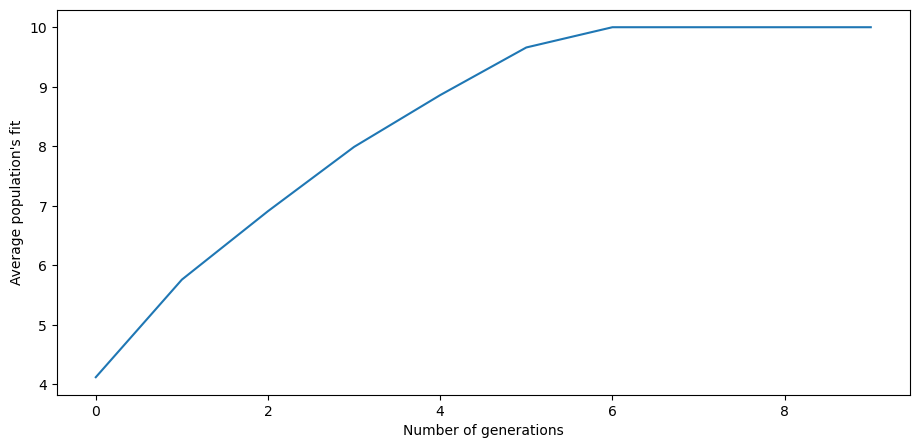

In [8]:
#Crossover

def crossover(string, partner):
    son = string.copy()

    genes_1 = random.randint(0, len(string) // 2)
    genes_2 = random.randint(len(string) // 2, len(string))
    son[genes_1:genes_2] = partner[genes_1:genes_2]
    return son

POP = 100
random.seed(10)
pop = []

start_t=time.time()
for i in range(POP):
    string = string_maker()
    fit = fitness(string, goal)
    pop.append([i, string, fit])


avg_fit = []
stagnation_threshold = 3 
stagnation_count = 0
it=0

while stagnation_count < stagnation_threshold:
    survivors = sorted(pop, key=lambda x: x[2], reverse=True)
    survivors = survivors[:int(POP * 0.25)]
    pop = []
    it+=1

    for survivor in survivors:
        count = 0
        pop.append(survivor)

        while count != 3:
            goal = goal
            partner_n=random.choice(range(len(survivors)))
            partner=survivors[partner_n]
            partner_genes=partner[1]
            string = survivor[1]

            son=crossover(string,partner_genes)
            fitx = fitness(son, goal)
            n = count + survivor[0] + (100 * it)
            pop.append([n, son, fitx])
            count += 1


    fit_list = [i[2] for i in pop]
    sum_of_elements = sum(fit_list)
    average = sum_of_elements / len(fit_list)
    avg_fit.append(average)


    if len(avg_fit) >= 2 and avg_fit[-1] <= avg_fit[-2]:
        stagnation_count += 1
    else:
        stagnation_count = 0

end_t=time.time()
total_time=end_t-start_t
time_per_gen=total_time/it

print('goal:',goal,'--goal size:',(len(goal)))
print(f'time: {total_time:.4f}')

avg_fit=pd.Series(avg_fit)
avg_fit.plot(figsize=(11,5))
plt.ylabel("Average population's fit")
plt.xlabel("Number of generations")
plt.show

print('Number of generations:',it)
print(f'time per generation: {time_per_gen:.5f}')
survivors

# Comments - crossover
In addition to the general changes made in the code and described above, I had to change the crossover function by removing the correction gievn the variance of pattern lenghts. 

Once again the crossover seems to be more efficent having discovered the perfect goal, even if it's true that to proof this fact this experiment should be ran many times with different random seeds.

With this model, the time per generation between the two models is almost identical.

# Exercise 5
Explain the changes that would be necessary in the evaluation function, mutation, and
crossover to deal with a similar problem where the pattern would be of decimal digits and
not binary.

In [9]:
def random_pattern():
    return random.choice(range(9))

    
def string_maker():
    string_size=random.choice(range(16))
    bit=0
    pattern=[]
    while bit != string_size:
        rand_bit=random_pattern()
        pattern.append(rand_bit)
        bit +=1
    return pattern

def fitness(string, goal):
    fit = 0
    min_len = min(len(string), len(goal))  
    for i in range(min_len):
        if string[i] == goal[i]:
            fit += 1
    length_penalty = abs(len(string) - len(goal))
    fit -= length_penalty                             
    return fit


def single_mutation(string):
    mut_string=string.copy()
    random_digit=random.choice(range(len(mut_string)))
    mut_string[random_digit] = random.choice(range(9))
    return mut_string



The only changhes necessary were in string_maker and single_mutation functions (range(9) instead of [0,1]).

goal: [8, 2, 5, 7, 1, 0, 7] --goal size: 7
time: 0.0161
Number of generations: 34
time per generation: 0.00047


[[5069, [8, 2, 5, 7, 1, 0, 7], 7],
 [7171, [8, 2, 5, 7, 1, 0, 7], 7],
 [9672, [8, 2, 5, 7, 1, 0, 7], 7],
 [7071, [8, 2, 5, 7, 1, 0, 7], 7],
 [10371, [8, 2, 5, 7, 1, 0, 7], 7],
 [10372, [8, 2, 5, 7, 1, 0, 7], 7],
 [9571, [8, 2, 5, 7, 1, 0, 7], 7],
 [12572, [8, 2, 5, 7, 1, 0, 7], 7],
 [15772, [8, 2, 5, 7, 1, 0, 7], 7],
 [12273, [8, 2, 5, 7, 1, 0, 7], 7],
 [15473, [8, 2, 5, 7, 1, 0, 7], 7],
 [15474, [8, 2, 5, 7, 1, 0, 7], 7],
 [9373, [8, 2, 5, 7, 1, 0, 7], 7],
 [12473, [8, 2, 5, 7, 1, 0, 7], 7],
 [11775, [8, 2, 5, 7, 1, 0, 7], 7],
 [15077, [8, 2, 5, 7, 1, 0, 7], 7],
 [14677, [8, 2, 5, 7, 1, 0, 7], 7],
 [17979, [8, 2, 5, 7, 1, 0, 7], 7],
 [14577, [8, 2, 5, 7, 1, 0, 7], 7],
 [17678, [8, 2, 5, 7, 1, 0, 7], 7],
 [17478, [8, 2, 5, 7, 1, 0, 7], 7],
 [20778, [8, 2, 5, 7, 1, 0, 7], 7],
 [20579, [8, 2, 5, 7, 1, 0, 7], 7],
 [23881, [8, 2, 5, 7, 1, 0, 7], 7],
 [14477, [8, 2, 5, 7, 1, 0, 7], 7]]

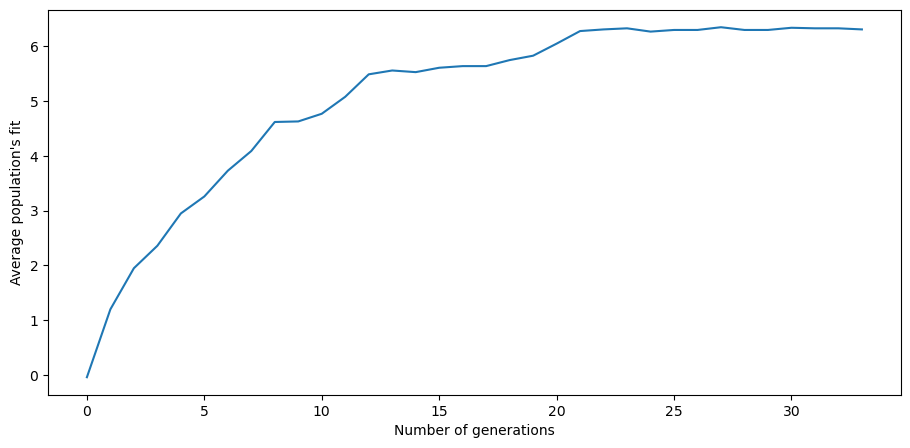

In [10]:
#mutation

random.seed(3)
POP = 100
goal=string_maker()
print('goal:',goal,'--goal size:',(len(goal)))
pop = []

start_t=time.time()
for i in range(POP):
    string = string_maker()
    fit = fitness(string, goal)
    pop.append([i, string, fit])


avg_fit = []
stagnation_threshold = 3
stagnation_count = 0
it=0

while stagnation_count < stagnation_threshold:
    survivors = sorted(pop, key=lambda x: x[2], reverse=True)
    survivors = survivors[:int(POP * 0.25)]
    pop = []
    it+=1

    for survivor in survivors:
        count = 0
        pop.append(survivor)

        while count != 3:

            goal = goal
            string = survivor[1]
            son = single_mutation(string)
            fitx = fitness(son, goal)
            n = count + survivor[0] + (100 * it)
            pop.append([n, son, fitx])
            count += 1


    fit_list = [i[2] for i in pop]
    sum_of_elements = sum(fit_list)
    average = sum_of_elements / len(fit_list)
    avg_fit.append(average)


    if len(avg_fit) >= 2 and avg_fit[-1] <= avg_fit[-2]:
        stagnation_count += 1
    else:
        stagnation_count = 0
end_t=time.time()
total_time=end_t-start_t
time_per_gen=total_time/it

print(f'time: {total_time:.4f}')

avg_fit=pd.Series(avg_fit)
avg_fit.plot(figsize=(11,5))
plt.ylabel("Average population's fit")
plt.xlabel("Number of generations")
plt.show

print('Number of generations:',it)
print(f'time per generation: {time_per_gen:.5f}')
#avg_fit
survivors


goal: [8, 2, 5, 7, 1, 0, 7] --goal size: 7
time: 0.0106
Number of generations: 15
time per generation: 0.00070


[[2590, [8, 2, 5, 7, 1, 0, 7], 7],
 [3990, [8, 2, 5, 7, 1, 0, 7], 7],
 [3991, [8, 2, 5, 7, 1, 0, 7], 7],
 [3992, [8, 2, 5, 7, 1, 0, 7], 7],
 [3890, [8, 2, 5, 7, 1, 0, 7], 7],
 [5290, [8, 2, 5, 7, 1, 0, 7], 7],
 [5291, [8, 2, 5, 7, 1, 0, 7], 7],
 [5292, [8, 2, 5, 7, 1, 0, 7], 7],
 [3891, [8, 2, 5, 7, 1, 0, 7], 7],
 [5291, [8, 2, 5, 7, 1, 0, 7], 7],
 [5292, [8, 2, 5, 7, 1, 0, 7], 7],
 [5293, [8, 2, 5, 7, 1, 0, 7], 7],
 [3892, [8, 2, 5, 7, 1, 0, 7], 7],
 [5292, [8, 2, 5, 7, 1, 0, 7], 7],
 [5293, [8, 2, 5, 7, 1, 0, 7], 7],
 [5294, [8, 2, 5, 7, 1, 0, 7], 7],
 [3790, [8, 2, 5, 7, 1, 0, 7], 7],
 [5190, [8, 2, 5, 7, 1, 0, 7], 7],
 [5191, [8, 2, 5, 7, 1, 0, 7], 7],
 [5192, [8, 2, 5, 7, 1, 0, 7], 7],
 [5090, [8, 2, 5, 7, 1, 0, 7], 7],
 [6490, [8, 2, 5, 7, 1, 0, 7], 7],
 [6491, [8, 2, 5, 7, 1, 0, 7], 7],
 [6492, [8, 2, 5, 7, 1, 0, 7], 7],
 [5091, [8, 2, 5, 7, 1, 0, 7], 7]]

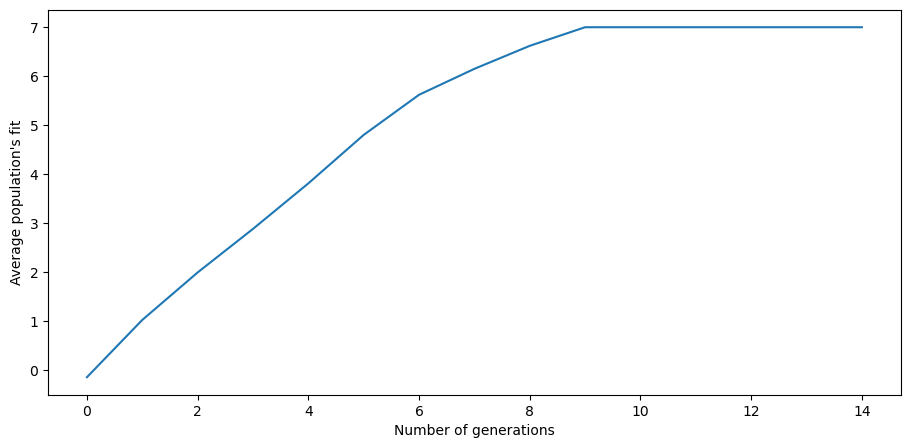

In [14]:
def crossover(string, partner):
    son = string.copy()
    correction=(random.choice(range(len(string)//2)))
    genes_1 = random.randint(0+correction, len(string) // 2)
    genes_2 = random.randint(len(string) // 2, len(string)-correction)
    son[genes_1:genes_2] = partner[genes_1:genes_2]
    return son

POP = 100
random.seed(54)
pop = []

start_t=time.time()
for i in range(POP):
    string = string_maker()
    fit = fitness(string, goal)
    pop.append([i, string, fit])


avg_fit = []
stagnation_threshold = 5
stagnation_count = 0
it=0

while stagnation_count < stagnation_threshold:
    survivors = sorted(pop, key=lambda x: x[2], reverse=True)
    survivors = survivors[:int(POP * 0.25)]
    pop = []
    it+=1

    for survivor in survivors:
        count = 0
        pop.append(survivor)

        while count != 3:
            goal = goal
            partner_n=random.choice(range(len(survivors)))
            partner=survivors[partner_n]
            partner_genes=partner[1]
            string = survivor[1]

            son=crossover(string,partner_genes)
            fitx = fitness(son, goal)
            n = count + survivor[0] + (100 * it)
            pop.append([n, son, fitx])
            count += 1


    fit_list = [i[2] for i in pop]
    sum_of_elements = sum(fit_list)
    average = sum_of_elements / len(fit_list)
    avg_fit.append(average)


    if len(avg_fit) >= 2 and avg_fit[-1] <= avg_fit[-2]:
        stagnation_count += 1
    else:
        stagnation_count = 0

end_t=time.time()
total_time=end_t-start_t
time_per_gen=total_time/it

print('goal:',goal,'--goal size:',(len(goal)))
print(f'time: {total_time:.4f}')

avg_fit=pd.Series(avg_fit)
avg_fit.plot(figsize=(11,5))
plt.ylabel("Average population's fit")
plt.xlabel("Number of generations")
plt.show

print('Number of generations:',it)
print(f'time per generation: {time_per_gen:.5f}')
survivors

The only small necessary change was the implementation (once again) of a correction in the crossover function, this time way smaller (the maximum correction possible is 50%  of the pattern length).
Without that the model wasn't able to reach the target.